In [1]:
# Assignment Setup: Upload the Kaggle train.csv file
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [2]:
# Assignment I - Task 1: Import the dataset and convert the datetime column
# Answer: The dataset is loaded from train.csv and the 'datetime' column is successfully converted to pandas datetime.
import pandas as pd

df = pd.read_csv("train.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# Assignment I - Task 2: Check data types, number of rows, and missing values
# Answer: The dataset has 10,886 rows and 0 missing values in all columns. Data types are consistent with the description.
df.info()
df.isnull().sum()
len(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


10886

In [5]:
# Assignment I - Task 3: Create year, month, day of week, and hour columns
# Answer: New columns 'year', 'month', 'dayofweek', and 'hour' are created from the 'datetime' column.
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['dayofweek'] = df['datetime'].dt.dayofweek
df['hour'] = df['datetime'].dt.hour


In [6]:
# Assignment I - Task 4: Rename the values in the 'season' column
# Answer: Seasons are mapped as 1→spring, 2→summer, 3→fall, 4→winter.
df['season'] = df['season'].map({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})


In [7]:
# Assignment I - Task 5: Total number of casual and registered bikes rented in 2011 and 2012
# Answer: 2011 → casual: 155,817 | registered: 626,162; 2012 → casual: 236,318 | registered: 1,067,179.
# Both casual and registered rentals increased substantially in 2012.
df.groupby("year")[["casual", "registered"]].sum()


,casual,registered
year,,
2011,155817,626162
2012,236318,1067179


In [8]:
# Assignment I - Task 6: Mean hourly total rentals by season
# Answer: Fall has the highest mean (~234), followed by summer (~215), winter (~199), and spring has the lowest (~116).
df.groupby("season")["count"].mean()


,count
season,
fall,234.417124
spring,116.343261
summer,215.251372
winter,198.988296


In [9]:
# Assignment I - Task 7: Compare registered and casual rentals on working vs non-working days, by year
# Answer: Registered users rent more on working days in both 2011 and 2012.
# Casual users rent more on non-working days (weekends/holidays) in both years.
df.groupby(["workingday", "year"])[["registered", "casual"]].mean()


registered     casual
workingday year                       
0          2011   97.153132  48.201276
           2012  160.767429  70.250286
1          2011  124.031909  19.664143
           2012  211.587507  30.527733

In [10]:
# Assignment I - Task 8: Highest and lowest total rentals per month for 2011 and 2012
# Answer: 2011 → highest: July, lowest: January.
#         2012 → highest: September, lowest: January.
df.groupby(["year", "month"])["count"].sum()


year  month
2011  1         23552
      2         32844
      3         38735
      4         50517
      5         79713
      6         89776
      7         92848
      8         83296
      9         79104
      10        79522
      11        70889
      12        61183
2012  1         56332
      2         66269
      3         94766
      4        116885
      5        120434
      6        130957
      7        121769
      8        130220
      9        133425
      10       127912
      11       105551
      12        98977
Name: count, dtype: int64

In [11]:
# Assignment I - Task 9: Mean hourly rentals by weather category
# Answer: Weather category 1 (clear/few clouds) has the highest mean rentals.
# Weather category 3 (light snow/light rain) has the lowest mean rentals.
df.groupby("weather")["count"].mean()


,count
weather,
1,205.236791
2,178.955540
3,118.846333
4,164.000000


In [12]:
# Assignment I - Task 10: Correlation between 'count' and numerical variables
# Answer: 'registered' has the highest positive correlation with 'count' (~0.97),
# followed by 'casual' (~0.69). Humidity has a notable negative correlation (~-0.32).
df.corr(numeric_only=True)["count"].sort_values(ascending=False)


,count
count,1.000000
registered,0.970948
casual,0.690414
hour,0.400601
temp,0.394454
atemp,0.389784
year,0.260403
month,0.166862
windspeed,0.101369
workingday,0.011594


In [13]:
# Assignment I - Task 11: Create the 'day_period' categorical column
# Answer: 'day_period' is defined as night (0–6), morning (6–12), afternoon (12–18), and evening (18–24).
def period(h):
    if h < 6: return "night"
    elif h < 12: return "morning"
    elif h < 18: return "afternoon"
    else: return "evening"

df["day_period"] = df["hour"].apply(period)


In [14]:
# Assignment I - Task 12: Pivot table of mean hourly rentals by day_period and workingday
# Answer: On working days, rentals peak in the morning and evening (commute hours).
# On non-working days, rentals peak in the afternoon.
import numpy as np

pd.pivot_table(df,
               values="count",
               index="day_period",
               columns="workingday",
               aggfunc=np.mean)


/tmp/ipython-input-2216734742.py:3: FutureWarning: The provided callable <function mean at 0x7c5780b98220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df,


workingday,0,1
day_period,,
afternoon,371.022989,266.196141
evening,180.182759,251.054662
morning,157.772414,234.353763
night,44.052083,16.217582


In [15]:
# Assignment II - Setup: Import seaborn and matplotlib for visualizations
import seaborn as sns
import matplotlib.pyplot as plt


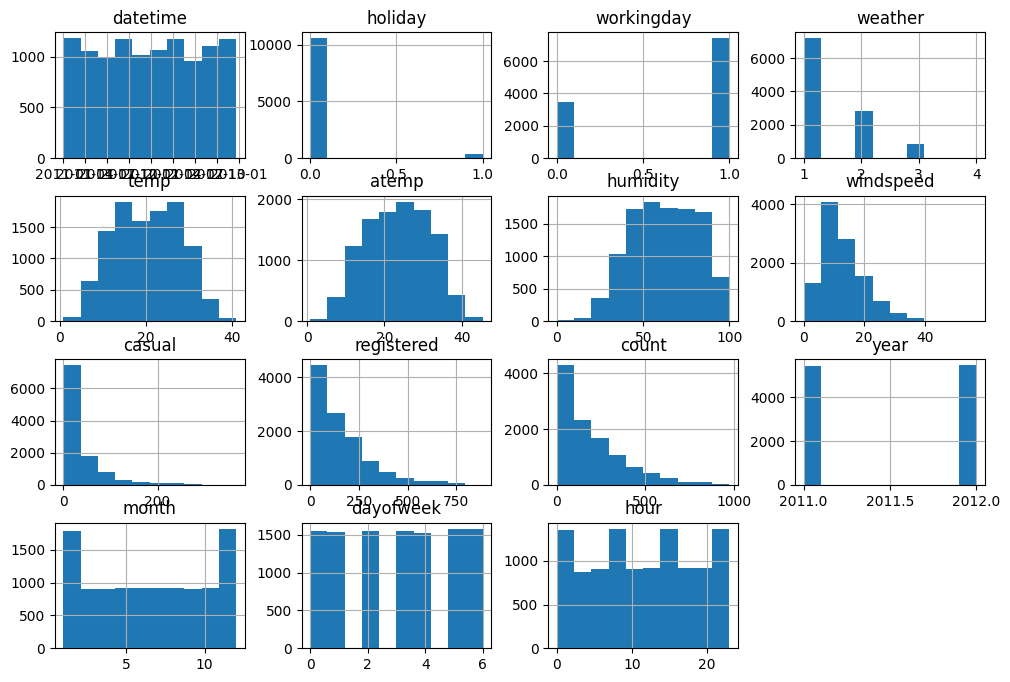

In [16]:
# Assignment II - Task 1: Plot histograms of all numerical columns
# Answer (observation): 'count' is right-skewed and temperature variables show bell-shaped distributions.
df.hist(figsize=(12,8))
plt.show()


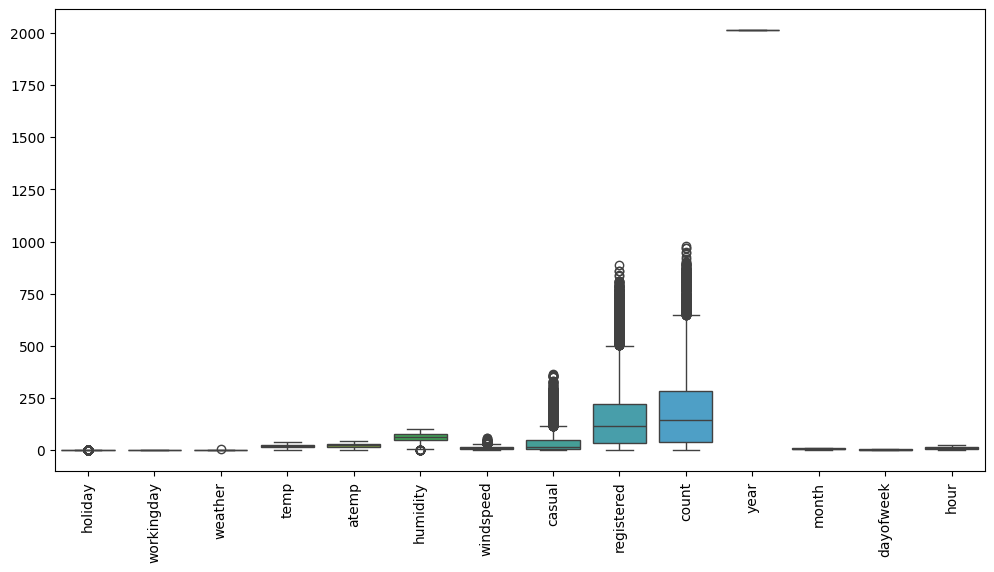

In [17]:
# Assignment II - Task 2: Plot boxplots of all numerical columns
# Answer (observation): There are high-value outliers in 'casual', 'registered', and 'count'.
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes("number"))
plt.xticks(rotation=90)
plt.show()


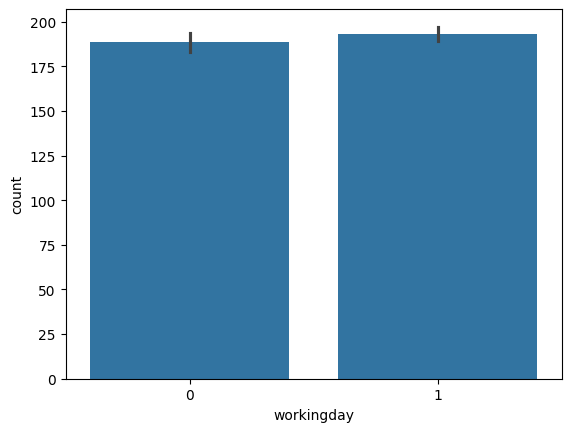

In [18]:
# Assignment II - Task 3: Mean hourly rentals for working and non-working days
# Answer (observation): Working days have slightly higher average rentals overall than non-working days.
sns.barplot(data=df, x="workingday", y="count")
plt.show()


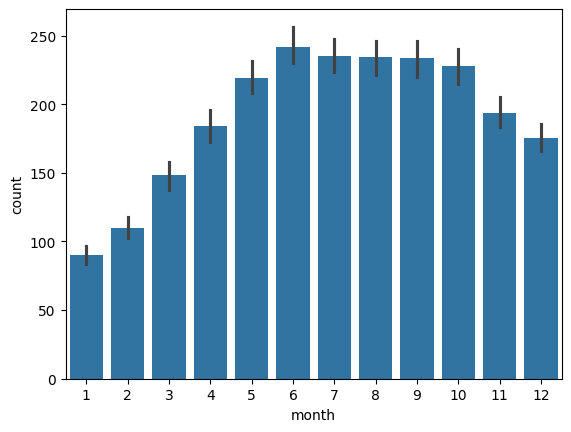

In [19]:
# Assignment II - Task 4: Mean hourly rentals by month (both years combined)
# Answer (observation): Rentals increase from winter to summer, peaking around June–September, then decline in winter.
sns.barplot(data=df, x="month", y="count")
plt.show()


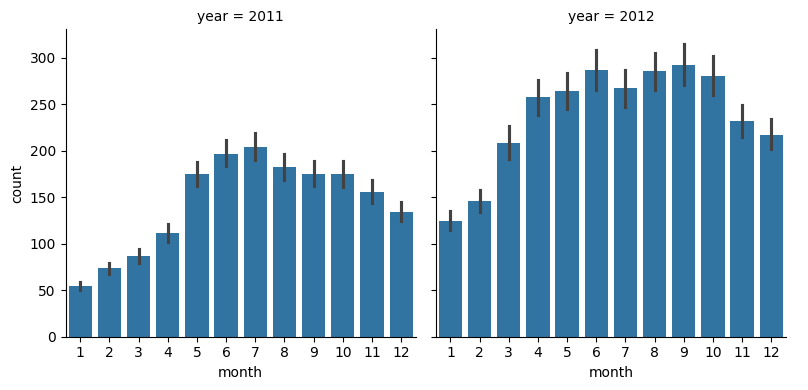

In [20]:
# Assignment II - Task 5: Mean hourly rentals by month for each year in a multi-panel figure
# Answer (observation): 2012 has consistently higher rentals than 2011 for the same months, especially from spring onward.
sns.catplot(
    data=df,
    x="month",
    y="count",
    col="year",
    kind="bar",
    height=4,
    aspect=1
)


/tmp/ipython-input-1069899738.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x="weather", y="count", ci=95)


<Axes: xlabel='weather', ylabel='count'>

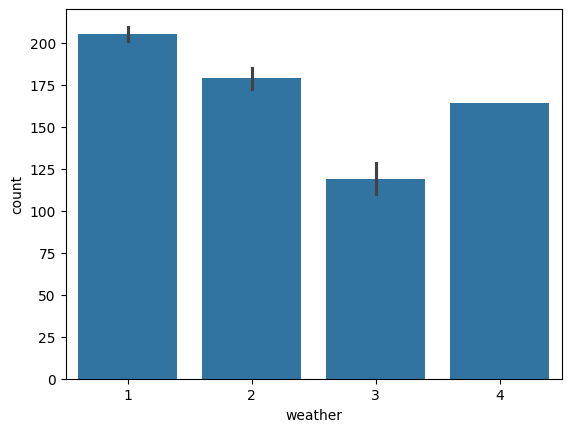

In [21]:
# Assignment II - Task 6: Mean rentals and 95% CI by weather category
# Answer (observation): Clear weather (category 1) has the highest rentals with relatively tight confidence intervals;
# worse weather conditions correspond to lower mean rentals and wider uncertainty.
sns.barplot(data=df, x="weather", y="count", ci=95)


<Axes: xlabel='hour', ylabel='count'>

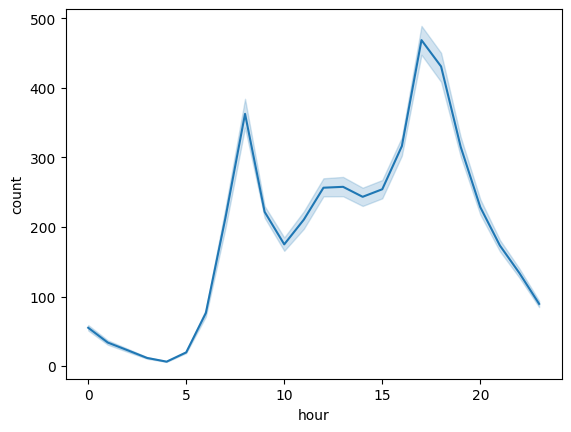

In [23]:
# Assignment II - Task 7: Mean hourly rentals versus hour of the day
# Answer (observation): The highest rental counts occur around 8 AM and 5 PM, reflecting commuting peaks.
sns.lineplot(data=df, x="hour", y="count")


<Axes: xlabel='hour', ylabel='count'>

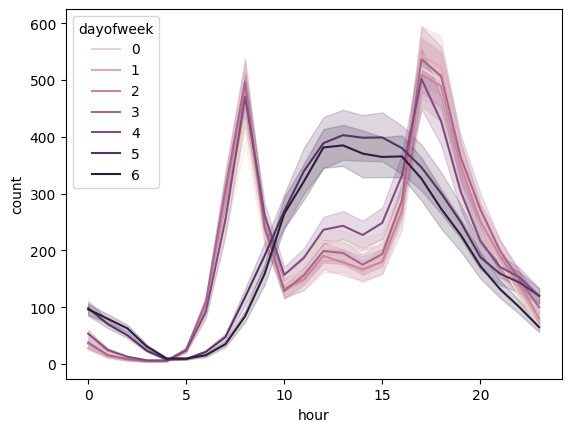

In [24]:
# Assignment II - Task 8: Mean hourly rentals by hour and day of the week
# Answer (observation): Weekdays show strong morning and evening peaks, while weekends have flatter curves with mid-day peaks.
sns.lineplot(data=df, x="hour", y="count", hue="dayofweek")


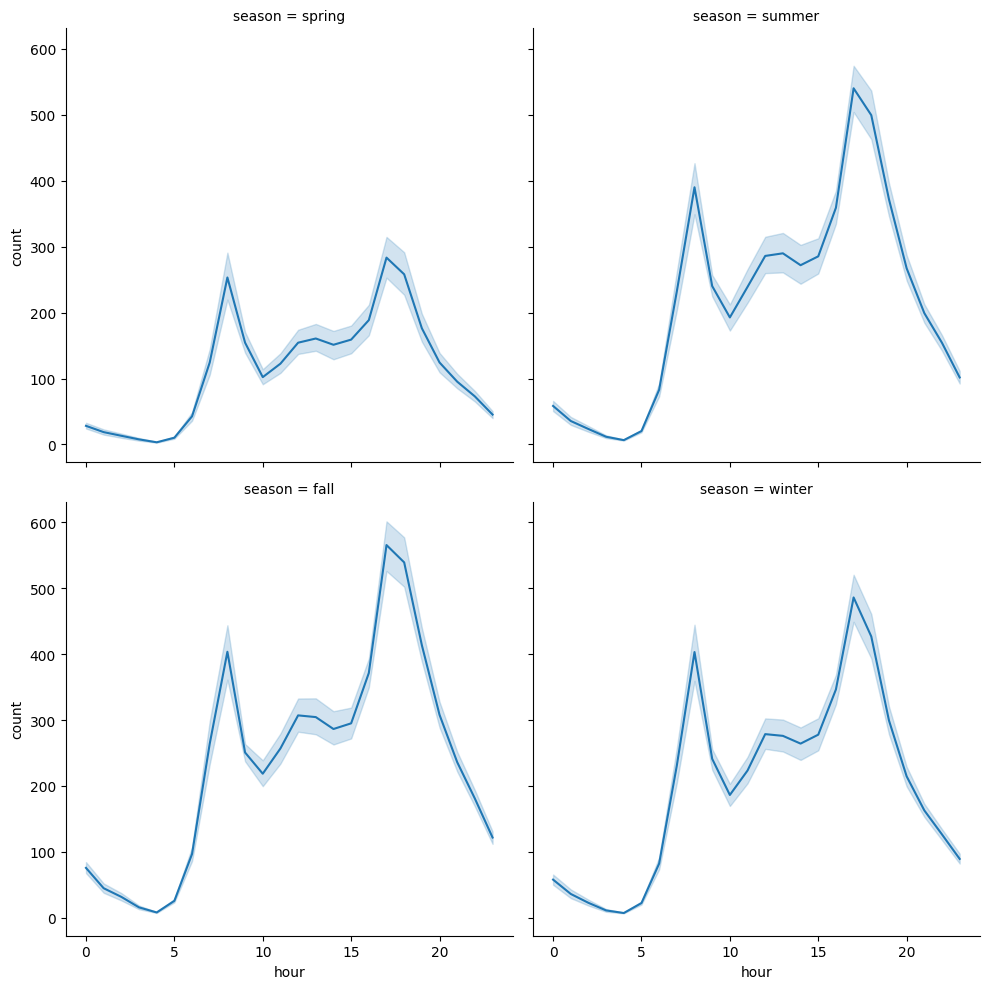

In [25]:
# Assignment II - Task 9: Mean hourly rentals by hour and season (multi-panel)
# Answer (observation): Winter has the lowest rentals throughout the day; summer and fall have higher and more stable rentals.
sns.relplot(
    data=df,
    x="hour",
    y="count",
    col="season",
    kind="line",
    col_wrap=2
)


/tmp/ipython-input-973136397.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x="day_period", y="count", ci=95)


<Axes: xlabel='day_period', ylabel='count'>

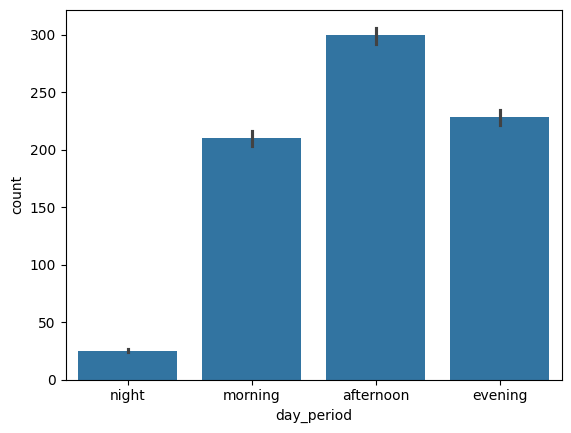

In [26]:
# Assignment II - Task 10: Mean rentals and 95% CI by day_period
# Answer (observation): The afternoon period has the highest rentals overall.
# On working days, mornings and evenings are also high due to commuting.
sns.barplot(data=df, x="day_period", y="count", ci=95)


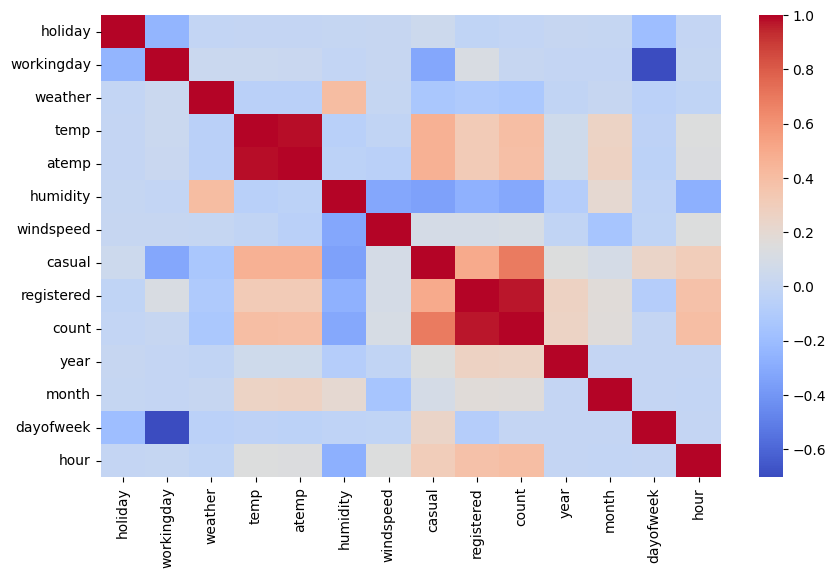

In [27]:
# Assignment II - Task 11: Heatmap of the correlation matrix for numerical variables
# Answer (observation): 'temp', 'atemp', 'casual', and 'registered' are positively correlated with 'count',
# while 'humidity' is negatively correlated. 'registered' dominates the relationship with 'count'.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.show()


In [ ]:
# Assignment III: Streamlit Dashboard
# This cell defines an interactive dashboard with multiple plots and 
# at least three interactive widgets, as required in the assignment.

import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

st.set_page_config(page_title="Bike Sharing Dashboard", layout="wide")
st.title("Washington D.C. Bike Sharing – Interactive Dashboard")
st.write(
    "This dashboard summarizes key findings from the exploratory data analysis "
    "of the Washington D.C. bike sharing dataset (2011–2012)."
)

# Load and preprocess data
df = pd.read_csv("train.csv")
df["datetime"] = pd.to_datetime(df["datetime"])
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["dayofweek"] = df["datetime"].dt.dayofweek
df["hour"] = df["datetime"].dt.hour

# Map season values if needed
season_map = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}
df["season"] = df["season"].map(season_map).fillna(df["season"])

# Day period column
def period(h):
    if h < 6:
        return "night"
    elif h < 12:
        return "morning"
    elif h < 18:
        return "afternoon"
    else:
        return "evening"

df["day_period"] = df["hour"].apply(period)

# Sidebar widgets
st.sidebar.header("Filters")

year_options = ["All"] + sorted(df["year"].unique().tolist())
year_choice = st.sidebar.selectbox("Year", year_options)

season_options = sorted(df["season"].unique().tolist())
season_choice = st.sidebar.multiselect("Season", season_options, default=season_options)

working_choice = st.sidebar.radio("Working Day?", ("Both", "Working day", "Non-working day"))

day_map = {
    0: "Monday", 1: "Tuesday", 2: "Wednesday",
    3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"
}
df["day_name"] = df["dayofweek"].map(day_map)
dow_options = ["All"] + [day_map[d] for d in sorted(df["dayofweek"].unique())]
dow_choice = st.sidebar.selectbox("Day of Week", dow_options)

# Apply filters
filtered = df.copy()

if year_choice != "All":
    filtered = filtered[filtered["year"] == year_choice]

if season_choice:
    filtered = filtered[filtered["season"].isin(season_choice)]

if working_choice == "Working day":
    filtered = filtered[filtered["workingday"] == 1]
elif working_choice == "Non-working day":
    filtered = filtered[filtered["workingday"] == 0]

if dow_choice != "All":
    filtered = filtered[filtered["day_name"] == dow_choice]

if filtered.empty:
    st.warning("No data available for the selected filters.")
    st.stop()

# Tabs for plots
tab1, tab2, tab3 = st.tabs([
    "Hourly & Day Period",
    "Time Trends (Month & Season)",
    "Working Day & Weather"
])

# ------- TAB 1 -------
with tab1:
    st.subheader("Mean Rentals by Hour")
    hourly = filtered.groupby("hour")["count"].mean().reset_index()
    fig1, ax1 = plt.subplots()
    sns.lineplot(data=hourly, x="hour", y="count", ax=ax1)
    st.pyplot(fig1)

    st.subheader("Mean Rentals by Day Period")
    dp = filtered.groupby("day_period")["count"].mean().reindex(
        ["night", "morning", "afternoon", "evening"]
    ).reset_index()
    fig2, ax2 = plt.subplots()
    sns.barplot(data=dp, x="day_period", y="count", ax=ax2)
    st.pyplot(fig2)

# ------- TAB 2 -------
with tab2:
    st.subheader("Mean Rentals by Month")
    monthly = filtered.groupby("month")["count"].mean().reset_index()
    fig3, ax3 = plt.subplots()
    sns.barplot(data=monthly, x="month", y="count", ax=ax3)
    st.pyplot(fig3)

    st.subheader("Mean Rentals by Season")
    season_agg = filtered.groupby("season")["count"].mean().reset_index()
    fig4, ax4 = plt.subplots()
    sns.barplot(data=season_agg, x="season", y="count", ax=ax4)
    st.pyplot(fig4)

# ------- TAB 3 -------
with tab3:
    st.subheader("Mean Rentals: Working vs Non-Working")
    wd = filtered.copy()
    wd["working_label"] = wd["workingday"].map({0: "Non-working", 1: "Working"})
    wd_agg = wd.groupby("working_label")["count"].mean().reset_index()
    fig5, ax5 = plt.subplots()
    sns.barplot(data=wd_agg, x="working_label", y="count", ax=ax5)
    st.pyplot(fig5)

    st.subheader("Mean Rentals by Weather Category")
    weather_agg = filtered.groupby("weather")["count"].mean().reset_index()
    fig6, ax6 = plt.subplots()
    sns.barplot(data=weather_agg, x="weather", y="count", ax=ax6)
    st.pyplot(fig6)

st.info(
    "This dashboard includes multiple plots and interactive filters "
    "(year, season, working day, and day of week) to satisfy Assignment III requirements."
)


: 